In [1]:
import numpy as np

dyn_lorenz = {"sigma":16.0, "R":45.92, "b": 4.0}
dyn_henon = {"a": 1.4, "b": 0.3}
x0_henon = np.array([0.0, 0.0])
x0 = np.array([10.0, 1.0, 0.0])

def lorenz (x0, dyn):
    sigma = dyn['sigma']
    R = dyn['R']
    b = dyn['b']
    x = x0[0]
    y = x0[1]
    z = x0[2]
    return np.array([sigma * (y - x), x * (R - z) - y, x * y - b * z])

def Henon (x0, dyn):
    a = dyn['a']
    b = dyn['b']
    x = x0[0]
    y = x0[1]
    return np.array([1 - a * x ** 2 + y, b * x])

def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn)*dt #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1,dyn)*dt
    k3 = f(x0 + 0.5*k2, dyn)*dt
    k4 = f(x0 + k3, dyn)*dt
    
    x = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    return x

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    print(x.shape)      
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1]) 
    return x




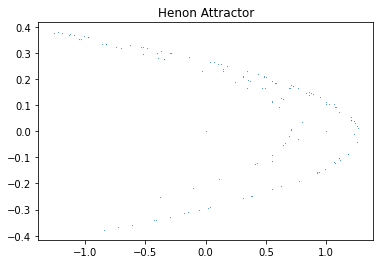

In [179]:
import numpy as np 
import matplotlib.pyplot as plt 

def henon_model(x, y, a=1.4, b=0.3):

    x_next = 1 - a * x ** 2 + y
    y_next = b * x
    return x_next, y_next

steps = 128
x_henon = np.zeros(steps + 1)
y_henon = np.zeros(steps + 1)


x_henon[0], y_henon[0] = 0, 0

for i in range(steps):
    x_next, y_next = henon_model(x_henon[i], y_henon[i])
    x_henon[i+1] = x_next
    y_henon[i+1] = y_next
    

plt.plot(x_henon, y_henon, '^', alpha = 0.8, markersize=0.3)
plt.title('Henon Attractor')
plt.savefig('Henon_Attractor.png')
plt.show()

plt.close()

In [205]:
IND = 0
SUM = 0.0
ITS = 0
IND2 = 0

DI = 1.e38 #any large number

NPT = len(x_henon)
DIM = 2 #is dimension 12 ?
dt = 1
TAU_physical = 1 #integer
TAU = int(TAU_physical/dt)
SCALMX = 5
SCALMN = 0.5
EVOLV_physical = 2 #time from t0 to t1
EVOLV = int(EVOLV_physical/dt) #integer

In [206]:
EVOLV

2

In [207]:
NPT = NPT - DIM*TAU - EVOLV

In [208]:
NPT

125

In [209]:
Z = np.empty([int(NPT),DIM])

In [210]:
#Z(I,J)=JTH COMPONENT OF ITH RECONSTRUCTED ATTRACTOR POINT
#Z(I,J) = X(I+(J-1)*TAU)
#tau = k*dt
for i in range(int(NPT)):
    for j in range(DIM):
        #Z[i][j-1] = x[0][i + (j-1)*TAU]
        #Z[i][j] = x[0][int(int((i*dt + (j-1)*dt*TAU))/dt)]
        Z[i][j] = x_henon[i + (j-1)*TAU]

In [211]:
#find nearest neighbor to the first data point
for i in range(1, int(NPT)):
    D = 0.0
    #iterate through the array, compare first point with the rest
    D = np.linalg.norm(Z[IND] - Z[i])
    #print(D)
    if ((D<DI) and (D>=SCALMN)):
        DI = D
        IND2 = i

In [212]:
DI

0.5017896364594139

In [213]:
SUM_list = []
while ((IND + EVOLV < int(NPT)) and (IND2 + EVOLV < int(NPT))): #40
    PT1 = Z[IND+EVOLV] #would this be the dimesion
    PT2 = Z[IND2+EVOLV]
    DF = np.linalg.norm(PT1 - PT2)
    ITS = ITS + 1
    SUM_list.append(SUM)
    SUM = SUM + np.log2(DF/DI)/EVOLV_physical
    ZLYAP = SUM/float(ITS)
    INDOLD = IND2
    ZMULT = 1.0
    ANGLMX = 0.3
    #THMIN = 3.14
    while (True): #70
        #print("here")
        THMIN = 3.14

        for i in range (int(NPT)): #100
            III = int(np.absolute(i-(IND+EVOLV)))
            if (III >= 10):
                #find angular change old to new vector
                DNEW = 0.0
                DNEW = np.linalg.norm(PT1 - Z[i])
                if ((DNEW <= ZMULT*SCALMX) and (DNEW >= SCALMN)):
                    DOT = 0.0
                    DOT = np.dot((PT1 - Z[i]),(PT1 - PT2))
                    CTH = np.absolute(DOT/(DNEW*DF))
                    #print(CTH)
                    if (CTH > 1.0):
                        CTH = 1.0
                    TH = np.arccos(CTH)
                    #save smallest angular change so far
                    if TH <= THMIN:
                        THMIN = TH
                        DII = DNEW
                        IND2 = i
        if (THMIN < ANGLMX):
            #print ("here")
            break
        # look at longer distance if cant find replacement
        ZMULT = ZMULT + 1
        if (ZMULT > 5):
            #no replacement at 5*scale, double search angle, reset distance
            ZMULT = 1.0
            ANGLMX = 2.0*ANGLMX
        if (ANGLMX >= 3.14):
            IND2 = INDOLD + EVOLV
            DII = DF
    IND = IND + EVOLV
    if (IND > NPT):
        print('here')
        break
    print ("IND, IND2, NPT", IND, IND2, NPT)
    DI = DII

IND, IND2, NPT 2 117 125
IND, IND2, NPT 4 92 125
IND, IND2, NPT 6 94 125
IND, IND2, NPT 8 96 125
IND, IND2, NPT 10 98 125
IND, IND2, NPT 12 100 125
IND, IND2, NPT 14 47 125
IND, IND2, NPT 16 49 125
IND, IND2, NPT 18 51 125
IND, IND2, NPT 20 53 125
IND, IND2, NPT 22 55 125
IND, IND2, NPT 24 9 125
IND, IND2, NPT 26 11 125
IND, IND2, NPT 28 0 125
IND, IND2, NPT 30 2 125
IND, IND2, NPT 32 4 125
IND, IND2, NPT 34 6 125
IND, IND2, NPT 36 8 125
IND, IND2, NPT 38 10 125
IND, IND2, NPT 40 12 125
IND, IND2, NPT 42 14 125
IND, IND2, NPT 44 16 125
IND, IND2, NPT 46 18 125
IND, IND2, NPT 48 20 125
IND, IND2, NPT 50 22 125
IND, IND2, NPT 52 24 125
IND, IND2, NPT 54 29 125
IND, IND2, NPT 56 31 125
IND, IND2, NPT 58 33 125
IND, IND2, NPT 60 35 125
IND, IND2, NPT 62 37 125
IND, IND2, NPT 64 124 125


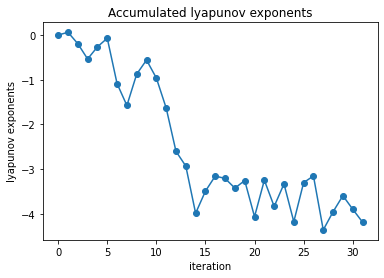

In [215]:
import matplotlib.pyplot as plt

plt.plot(SUM_list)
plt.scatter(range(len(SUM_list)),SUM_list)
plt.title('Accumulated lyapunov exponents')
plt.ylabel('lyapunov exponents')
plt.xlabel('iteration')
plt.savefig('henon_tau1.png')

In [ ]:
1/12
[0.0,
 -0.43499174023252746,
 0.587371061904862,
 0.9668512934105051,
 1.9817830893799147,
 2.835795689693932]